In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
dt=pd.read_csv('healthcare-dataset-stroke-data.csv')
dt

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
dt.shape

(5110, 12)

In [4]:
dt.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
dt.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dt['bmi']=dt['bmi'].fillna(dt['bmi'].mean())
dt=dt.drop(['id','ever_married'],axis=1)

In [7]:
dt

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Private,Rural,166.29,25.600000,formerly smoked,0


In [8]:
le=LabelEncoder()

dt['gender']=le.fit_transform(dt['gender'])
dt['work_type']=le.fit_transform(dt['work_type'])
dt['Residence_type']=le.fit_transform(dt['Residence_type'])
dt['smoking_status']=le.fit_transform(dt['smoking_status'])
dt['age']=dt['age'].astype('int32')
dt['bmi']=dt['bmi'].astype('int32')
dt['avg_glucose_level']=dt['avg_glucose_level'].astype('int32')

In [9]:
dt

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,2,1,228,36,1,1
1,0,61,0,0,3,0,202,28,2,1
2,1,80,0,1,2,0,105,32,2,1
3,0,49,0,0,2,1,171,34,3,1
4,0,79,1,0,3,0,174,24,2,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,2,1,83,28,2,0
5106,0,81,0,0,3,1,125,40,2,0
5107,0,35,0,0,3,0,82,30,2,0
5108,1,51,0,0,2,0,166,25,1,0


In [10]:
x=dt.drop('stroke',axis=1)
y=dt['stroke']

In [11]:
x

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,2,1,228,36,1
1,0,61,0,0,3,0,202,28,2
2,1,80,0,1,2,0,105,32,2
3,0,49,0,0,2,1,171,34,3
4,0,79,1,0,3,0,174,24,2
...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,2,1,83,28,2
5106,0,81,0,0,3,1,125,40,2
5107,0,35,0,0,3,0,82,30,2
5108,1,51,0,0,2,0,166,25,1


In [12]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=30)

In [14]:
xtrain.shape

(3832, 9)

In [15]:
xtest.shape

(1278, 9)

In [16]:
scale=StandardScaler()
xtrain_scaled=scale.fit_transform(xtrain)
xtest_scaled=scale.fit_transform(xtest)

## Adding layers

In [17]:
model=Sequential()

model.add(Dense(10,input_dim=9,activation='relu',kernel_initializer="uniform"))

model.add(Dense(20,activation='relu',kernel_initializer="uniform"))

model.add(Dense(30,activation='relu',kernel_initializer="uniform"))

model.add(Dense(40,activation='relu',kernel_initializer="uniform"))

model.add(Dense(1,activation="sigmoid"))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.10),metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,231 (8.71 KB)

 Trainable params: 2,231 (8.71 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [19]:
training_history=model.fit(xtrain_scaled,ytrain,epochs=50,batch_size=10,validation_data=(xtest_scaled,ytest))

training_history

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9492 - loss: 0.2731 - val_accuracy: 0.9601 - val_loss: 0.1678
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9474 - loss: 0.2066 - val_accuracy: 0.9601 - val_loss: 0.1677
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9519 - loss: 0.1927 - val_accuracy: 0.9601 - val_loss: 0.1707
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.2083 - val_accuracy: 0.9601 - val_loss: 0.1676
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9501 - loss: 0.1994 - val_accuracy: 0.9601 - val_loss: 0.1679
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9444 - loss: 0.2161 - val_accuracy: 0.9601 - val_loss: 0.1677
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9448 - loss: 0.2150 - val_accuracy: 0.9601 - val_loss: 0.1676
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9475 - loss: 0.2068 - val_accuracy: 0.

In [20]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
hist["val_accuracy"][-1]

0.9600939154624939

Text(0, 0.5, 'Loss')

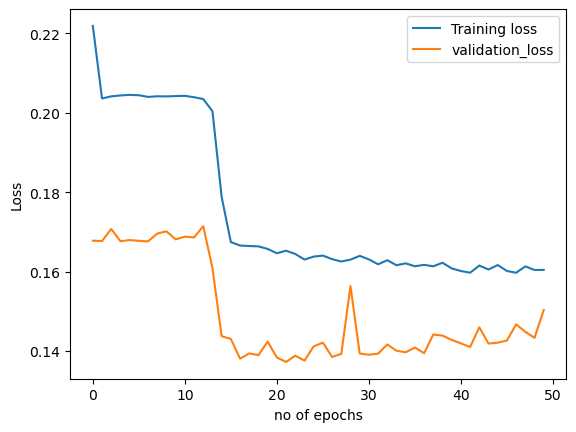

In [22]:
plt.plot(hist["loss"],label="Training loss")
plt.plot(hist["val_loss"],label="validation_loss")
plt.legend()
plt.xlabel("no of epochs")
plt.ylabel("Loss")

In [23]:
ypred=model.predict(xtest_scaled)
ypred

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.2088736 ],
       [0.00182448],
       [0.004848  ],
       ...,
       [0.00323502],
       [0.00028776],
       [0.02720279]], dtype=float32)

In [24]:
ypred_classes=(ypred>0.5).astype('int32')
ypred_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
print(classification_report(ytest,ypred_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1227
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.92      0.96      0.94      1278



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
cm=confusion_matrix(ytest,ypred_classes)
cm

array([[1227,    0],
       [  51,    0]], dtype=int64)